In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-11 20:41:22.667649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/qc/hkffj6qx3jl2g19d78lxb3440000gn/T/ipykernel_53537/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
training_Set = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testing_Set = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(training_Set, batch_size=25, shuffle=True)
test = torch.utils.data.DataLoader(testing_Set, batch_size=25, shuffle=True)

In [3]:
def calc_Param(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val

In [4]:
class Model_1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class Model_2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class Model_3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

In [5]:
m_1 = Model_1()
m_2 = Model_2()
m_3 = Model_3()
costFunc = nn.CrossEntropyLoss()
m_1Opt = optim.Adam(m_1.parameters(), lr=0.001)
m_2Opt = optim.Adam(m_2.parameters(), lr=0.01)
m_3Opt = optim.Adam(m_3.parameters(), lr=0.1)

In [6]:
EPOCHS = 20
for index in range(EPOCHS):
    print(index)
    
    for batch in train:
        inputImages, groundTruth = batch
        m_1.zero_grad()
        out1 = m_1(inputImages.view(-1,784))
        cost = costFunc(out1, groundTruth)
        cost.backward()
        m_1Opt.step()

    for batch in train:
        inputImages, groundTruth = batch
        m_2.zero_grad()
        out1 = m_2(inputImages.view(-1,784))
        cost = costFunc(out1, groundTruth)
        cost.backward()
        m_2Opt.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [7]:
from torch.nn.utils import (
  parameters_to_vector as Params2Vec,
  vector_to_parameters as Vec2Params
)
mod1 = Params2Vec(m_1.parameters())
mod2 = Params2Vec(m_2.parameters())

alp = np.arange(-1.0, 2.0 , 0.15)
cost3_train = []
cost3_alp_train = []
cost3_test = []
acc3_alp_train = []

for a in alp:
    mod3 = (1 - a)*mod1 + a * mod2
    Vec2Params(mod3,m_3.parameters())
    total = 0
    correct = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            out1 = m_3(inputImages.view(-1,784))
            cost = costFunc(out1, groundTruth)
            costTotal += cost
            costCounter += 1
            for i, out1Tensor in enumerate(out1):
                if torch.argmax(out1Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
        cost3_alp_train.append(costTotal / costCounter)
        acc3_alp_train.append(round(correct/total, 3))


In [8]:
acc3_alp_test = []
cost3_alp_test = []
for a in alp :
    mod3 = (1 - a)*mod1 + a * mod2
    Vec2Params(mod3,m_3.parameters())
    total = 0
    correct = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            out1 = m_3(inputImages.view(-1,784))
            cost = costFunc(out1, groundTruth)
            costTotal += cost
            costCounter += 1
            for i, out1Tensor in enumerate(out1):
                if torch.argmax(out1Tensor) == groundTruth[i]:
                    correct += 1
                total += 1
        cost3_alp_test.append(costTotal / costCounter)
        acc3_alp_test.append(round(correct/total, 3))

Text(0, 0.5, 'accuracy')

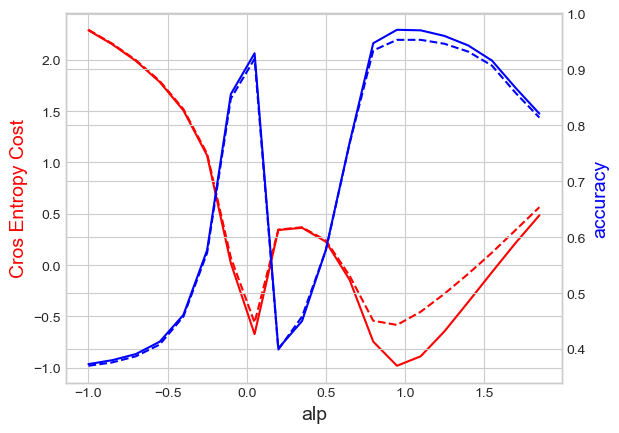

In [9]:
import math
from math import log
cost3_alp_train = [math.log10(i) for i in cost3_alp_train]
cost3_alp_test = [math.log10(i) for i in cost3_alp_test]
fig,ax = plt.subplots()
ax.plot(alp, cost3_alp_train, color="red")
ax.plot(alp, cost3_alp_test, color = "r", linestyle='dashed')
ax.set_xlabel("alp", fontsize = 14)
ax.set_ylabel("Cros Entropy Cost", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(alp, acc3_alp_train ,color="blue")
ax2.plot(alp, acc3_alp_test, color = "blue", linestyle='dashed')
ax2.set_ylabel("accuracy",color="blue",fontsize=14)
